**EE610 - Computing Assignment 2**

**Roll Numbers - 23M2155, 23M2156**

1. Consider the low-contrast image ('low-contrast-photography-1.jpg') given in the folder.

    (a) Improve the contrast of the image and at the same time maintain the color ratio in the original image. Experiment with possible contrast enhancement techniques and produce a good contrast image.

Text(0.5, 1.0, 'Histogram Equalized (Local) Image in HSI Model')

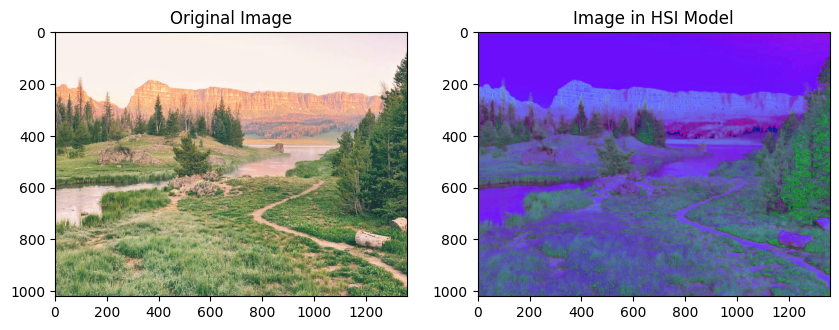

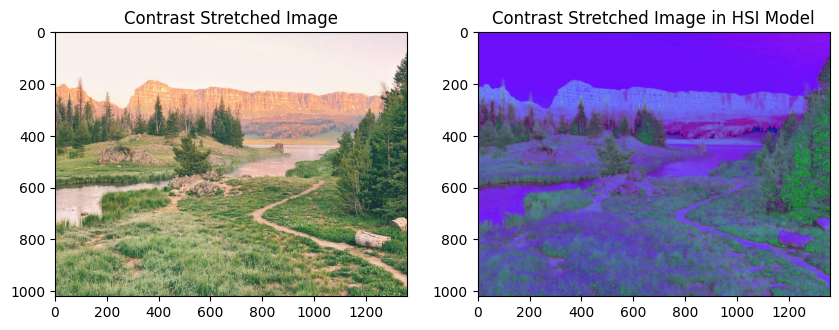

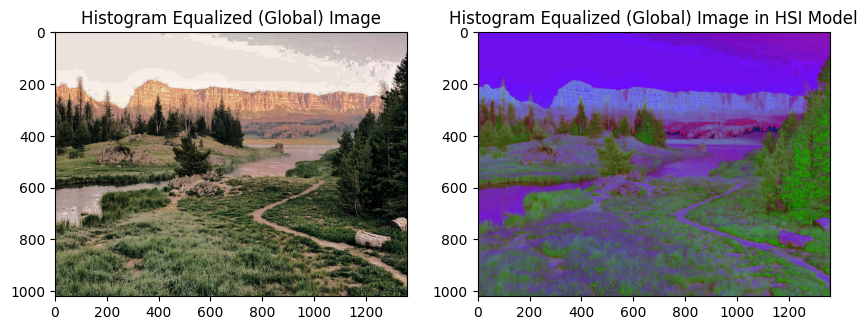

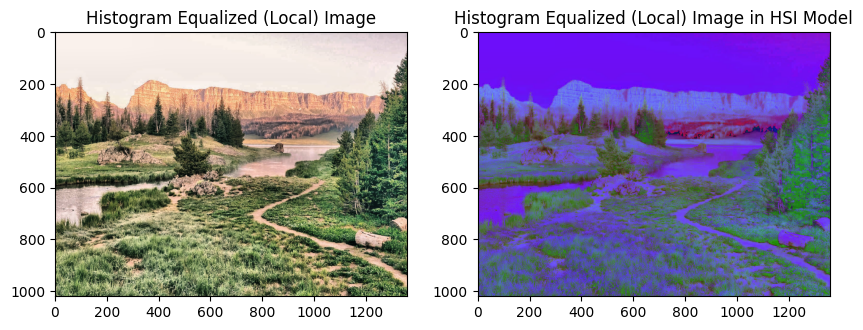

In [1]:
# Import the OpenCV library
# matplotlib.pyplot function is imported as plt for displaying the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image 'low-contrast-photography-1.jpg' using OpenCV
image_1 = cv2.imread('low-contrast-photography-1.jpg')
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)

# Convert the loaded image to the HSV (Hue-Saturation-Value) color space
hsi_image = cv2.cvtColor(image_1, cv2.COLOR_BGR2HSV)

# Split the HSI image into its H (Hue), S (Saturation), and I (Intensity or Value) channels
h, s, i = cv2.split(hsi_image)

# Convert to HSV color space
hsv_image_array = cv2.cvtColor(image_1, cv2.COLOR_BGR2HSV)
# Extract the Value channel
value = hsv_image_array[:, :, 2]
# Perform contrast stretching on the Value channel
min_value = np.min(value)
max_value = np.max(value)
stretched_value_channel = ((value - min_value) / (max_value - min_value)) * 255

# Update the Value channel with the stretched values
hsv_image_array[:, :, 2] = stretched_value_channel.astype(np.uint8)

# Convert back to RGB color space
contrast_stretched_image = cv2.cvtColor(hsv_image_array, cv2.COLOR_HSV2BGR)

# Apply global histogram equalization to the I (Intensity) channel to enhance contrast
i_equalized_1 = cv2.equalizeHist(i)

# Apply local histogram equalization to the I (Intensity) channel to enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
i_equalized_2 = clahe.apply(i)

# Merge the enhanced I channel with the original H and S channels to create an enhanced HSI image
image_enhanced_G = cv2.merge([h, s, i_equalized_1])

# Merge the enhanced I channel with the original H and S channels to create an enhanced HSI image
image_enhanced_L = cv2.merge([h, s, i_equalized_2])

# Convert the enhanced HSI image back to the BGR color space
enhanced_image_1 = cv2.cvtColor(image_enhanced_G, cv2.COLOR_HSV2BGR)

# Convert the enhanced HSI image back to the BGR color space
enhanced_image_2 = cv2.cvtColor(image_enhanced_L, cv2.COLOR_HSV2BGR)

# Create a figure for plotting
plt.figure(figsize=(10, 8))
# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title('Original Image')

# Subplot 2: Image in HSI Model
plt.subplot(1, 2, 2)
plt.imshow(hsi_image)
plt.title('Image in HSI Model')

# Create a figure for plotting
plt.figure(figsize=(10, 8))
# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(contrast_stretched_image)
plt.title('Contrast Stretched Image')

# Subplot 2: Image in HSI Model
plt.subplot(1, 2, 2)
plt.imshow(hsv_image_array)
plt.title('Contrast Stretched Image in HSI Model')

# Create a figure for plotting
plt.figure(figsize=(10, 8))
# Subplot 1 Contrast Enhanced Image
plt.subplot(1, 2, 1)
plt.imshow(enhanced_image_1)
plt.title('Histogram Equalized (Global) Image')

# Subplot 2: Enhanced Image in HSI Model
plt.subplot(1, 2, 2)
plt.imshow(image_enhanced_G)
plt.title('Histogram Equalized (Global) Image in HSI Model')

# Create a figure for plotting
plt.figure(figsize=(10, 8))
# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(enhanced_image_2)
plt.title('Histogram Equalized (Local) Image')

# Subplot 2: Image in HSI Model
plt.subplot(1, 2, 2)
plt.imshow(image_enhanced_L)
plt.title('Histogram Equalized (Local) Image in HSI Model')

**Answer:**

To improve the contrast of an image while maintaining the color ratio, we can use the HSI color model. In this model, we can enhance the intensity component (I) while keeping the hue (H) and saturation (S) components as it is. We tried this method, by splitting the HSI color model in respective channels (using cv2.split command, as can be seen in the code). After manipulating the intensity component, the 3 channels were again merged to form the contrast enhanced image.

**a) Contrast Stretching**
    
First, we applied to contrast stretching to the Intensity component to enhace the contrast of the given image but, as can be seen in the image this does not affect the image significantly. So, we tried following methods.

**b) Histogram Equalization (Global - using cv2.equalizeHist() command)**

To enhance the contrast of the given image, histogram equalization is another method that can be applied. Specifically, we have used global and local histogram equalization.  The result obtained using global histogram equalization can be seen in the above plots. Using this method contrast gets improved improves but, the some part of the image (part above the mountains) slightly deteriorates.

**c) Histogram Equalization (Local - using CLAHE)**

Lastly, we have applied local histogram equalization which yields better results. The image obtained after local equalization is much better than the one obtained by global equalization which can be seen in the images that we have plotted above.


**Conclusion:**

For this question, we have applied 3 different methods to enhance the contrast of the given color image. To do this, we used the HSI model. Contrast strectching gave minimal to none effect, global histogram equalization gave better results but the best results were obtained using the local histogram equalization. Global equalization method treats the entire image as a whole, which can lead to over enhancement in certain areas. On the other hand, CLAHE is an adaptive method that considers local variations and limits the amplification of contrast, making it more suitable for images with varying contrast levels. That is why we obtained the best results using the local histogram equalization (CLAHE Method).

b) Applying the algorithm you developed to some other low-contrast color image and demonstrate how well your algorithm works.

Text(0.5, 1.0, 'Enhanced Image in HSI Model')

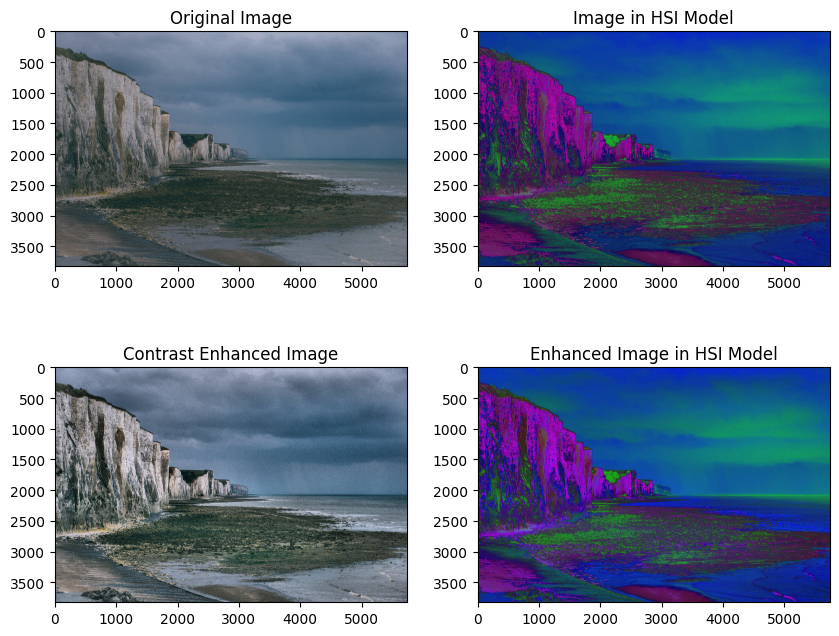

In [2]:
# Method - 1

# Import the OpenCV library
# matplotlib.pyplot function is imported as plt for displaying the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image 'low-contrast-photography-1.jpg' using OpenCV
image_b = cv2.imread('low_contrast_img.jpg')
image_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2RGB)

# Convert the loaded image to the HSV (Hue-Saturation-Value) color space
hsi_image_2 = cv2.cvtColor(image_b, cv2.COLOR_BGR2HSV)

# Split the HSI image into its H (Hue), S (Saturation), and I (Intensity or Value) channels
h_b, s_b, i_b = cv2.split(hsi_image_2)

# Apply local histogram equalization to the I (Intensity) channel to enhance contrast
clahe_2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
i_equalized_3 = clahe_2.apply(i_b)

# Merge the enhanced I channel with the original H and S channels to create an enhanced HSI image
image_2_b = cv2.merge([h_b, s_b, i_equalized_3])

# Convert the enhanced HSI image back to the BGR color space
enhanced_image_b = cv2.cvtColor(image_2_b, cv2.COLOR_HSV2BGR)

# Create a figure for plotting
plt.figure(figsize=(10, 8))
# Subplot 1: Original Image
plt.subplot(2, 2, 1)
plt.imshow(image_b)
plt.title('Original Image')

# Subplot 2: Image in HSI Model
plt.subplot(2, 2, 2)
plt.imshow(hsi_image_2)
plt.title('Image in HSI Model')

# Subplot 3: Contrast Enhanced Image
plt.subplot(2, 2, 3)
plt.imshow(enhanced_image_b)
plt.title('Contrast Enhanced Image')

# Subplot 4: Enhanced Image in HSI Model
plt.subplot(2, 2, 4)
plt.imshow(image_2_b)
plt.title('Enhanced Image in HSI Model')

**Answer:**

From part a), we concluded that local histogram equalization is the best method to enhance the contrast of the given color image. So, using the same method, we applied to a low contrast image shown above. The result of it is also displayed in the same diagram. From the improved image,we candefinitely say the contrast of the image has been enhanced and the method that we have selected is appropriate for such tasks. 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2. Remove the ink-dot effect from the image ’man with dots.jpg’ and make it more natural-looking. Justify your approach.

Text(0.5, 1.0, 'Spectrum After Filtering')

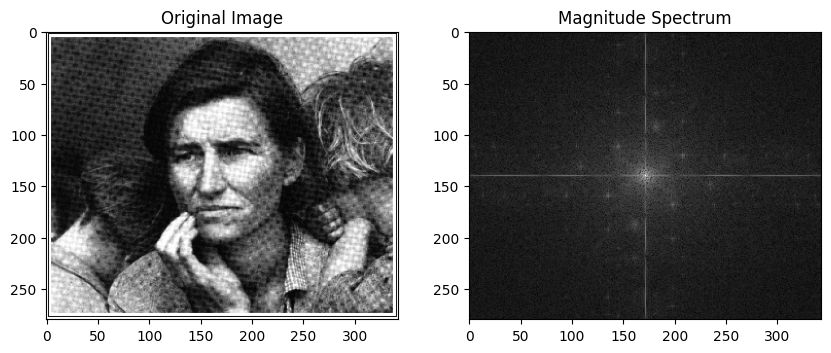

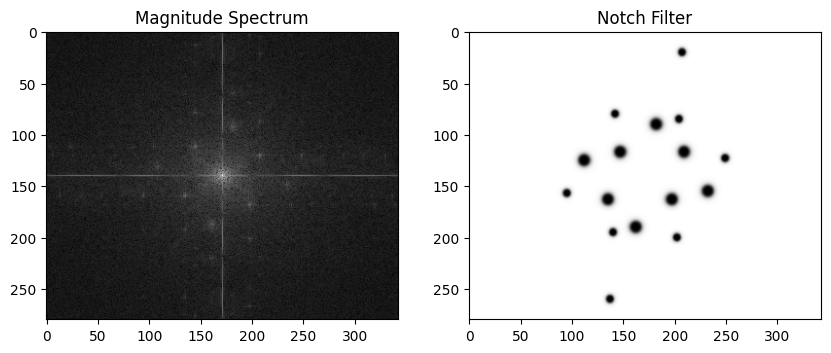

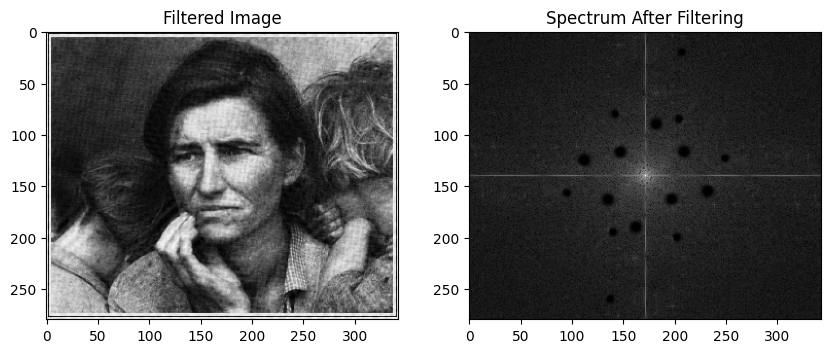

In [3]:
# cv2 library is imported
# matplotlib.pyplot function is imported as plt for displaying the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image 'man_with_dots.jpg' using cv2
image_man = cv2.imread('man_with_dots.jpg', 0)
# Get the shape of the loaded image
img_shape = image_man.shape

# Function to calculate Butterworth Notch Filter
def notch_filter(shape, D_0, u_k, v_k):
    n = 6   # Order of Transfer Function
    M, N = shape    # Shape of the image

    # Initialize filter with zeros
    H = np.zeros((M, N))
    
    # Loop through all the frequency components
    for u in range(0, M):
        for v in range(0, N):
            # Calculate distances from the center and apply the filter equation
            D_k1 = np.sqrt((u - M / 2 - u_k)** 2 + (v - N / 2 - v_k) ** 2)
            D_k2 = np.sqrt((u - M / 2 + u_k)** 2 + (v - N / 2 + v_k) ** 2)

            H[u, v] = (1 / (1 + (D_0 / D_k1) ** n)) * (1 / (1 + (D_0 / D_k2) ** n))

    return H

# Perform 2D FFT on the grayscale image
f = np.fft.fft2(image_man)
# Shift the zero frequency components to the center
fshift = np.fft.fftshift(f)
# Calculate the phase spectrum of the shifted FFT
phase_spectrumR = np.angle(fshift)
# Calculate the magnitude spectrum and apply a transformation
magnitude_spectrum = 20 * (np.log(np.abs(fshift) + 1) ** 3)

# Create multiple notch filters with specific parameters
H1 = notch_filter(img_shape, 6, 23, 25)
H2 = notch_filter(img_shape, 6, -23, 37)
H3 = notch_filter(img_shape, 4, 60, 30)
H4 = notch_filter(img_shape, 4, -55, 32)
H5 = notch_filter(img_shape, 6, -50, 10)
H6 = notch_filter(img_shape, 6, -15, -60)
H7 = notch_filter(img_shape, 4, -17, 77)
H8 = notch_filter(img_shape, 4, -120, 35)

# Combine the notch filters to create a single filter
NotchFilter = H1 * H2 * H3 * H4 * H5 * H6 * H7 * H8
# Apply the combined filter to the frequency domain representation of the image
NotchRejectCenter = fshift * NotchFilter 
# Shift the zero frequency components back to their original locations
NotchReject = np.fft.ifftshift(NotchRejectCenter)
# Compute the inverse DFT of the result to obtain the filtered image
inverse_NotchReject = np.fft.ifft2(NotchReject)

# Calculate the absolute value of the inverse transform
Result = np.abs(inverse_NotchReject)

# Create a figure for plotting
plt.figure(figsize=(10, 8))  
# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_man, cmap='gray')
plt.title('Original Image')

# Subplot 2: Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

# Create a figure for plotting
plt.figure(figsize=(10, 8)) 
# Subplot 1: Filtered Image
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')

# Subplot 2: Spectrum After Filtering
plt.subplot(1, 2, 2)
plt.imshow(NotchFilter, cmap='gray')
plt.title('Notch Filter')

# Create a figure for plotting
plt.figure(figsize=(10, 8)) 
# Subplot 1: Filtered Image
plt.subplot(1, 2, 1)
plt.imshow(Result, cmap='gray')
plt.title('Filtered Image')

# Subplot 2: Spectrum After Filtering
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum * NotchFilter, cmap='gray')
plt.title('Spectrum After Filtering')

**Answer:**

The given image 'man_with_dots.jpg' contains moiré pattern which is a visual phenomenon produced by superimposing 2 gratings of approximately equal spacing. To remove this ink-dot effect, we can use selective filtering in which specific bands of frequencies or small regions of the frequency rectangle are processed. Specifically to remove this effect, 'Notch Filter' is a good choice. We use a notch filter which will reject frequencies in a predefined neighbourhood of the frequency rectangle. The notch reject filter transfer functions are constructed as products of highpass filter transfer functions whose centers have been translated to the centers of the notches. 

We plotted the magnitude spectrum of the given image to get a better insight. The symmetric “impulse-like” bursts observed in the magnitude spectrum are a result of the near periodicity of the moiré pattern. We attenuated these bursts by using notch filtering. To attenuate these bursts, we used Butterworth notch reject transfer function as can be seen in the code (function named notch_filter is created). The function created takes 4 arguments which are the input image, the diameter of the black circular region (D_0), and the locations of the center of the notches (u_k, v_k). The value of the radius was selected (by visual inspection of the spectrum) to encompass the energy bursts completely, and the value of n was selected to produce notches with sharp transitions. The locations of the center of the notches were determined by looking at the magnified spectrum. Basically, we ran the code for number of times to obtain the ideal locations of the notches and we finalized the different values of the parameters by looking at the effect on the filtered image. We have also shown the spectrum of the notch filter and you can also see the filtered image and the spectrum of the filtered image. This shows how using the notch filtering, we can remove the ink-dot pattern from the given image.

Conclusion:
After implementing the Notch filter, we removed the ink dot effect and it can be concluded that this method is effective as the filtered image looks more.

-------------------------------------------------------------------------------------------------------------------------------------

3. Remove the interference pattern in the image 'astronaut-interference.tif'. Describe your steps and include appropriate intermediate images/plots to motivate your filter or enhancement choice.

(450.0, 550.0, 450.0, 350.0)

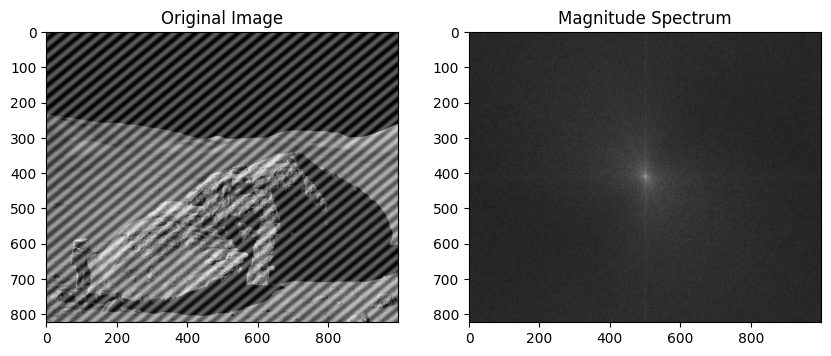

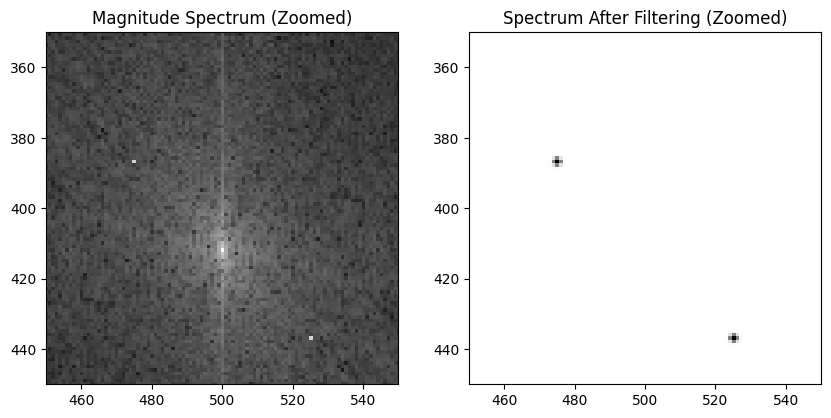

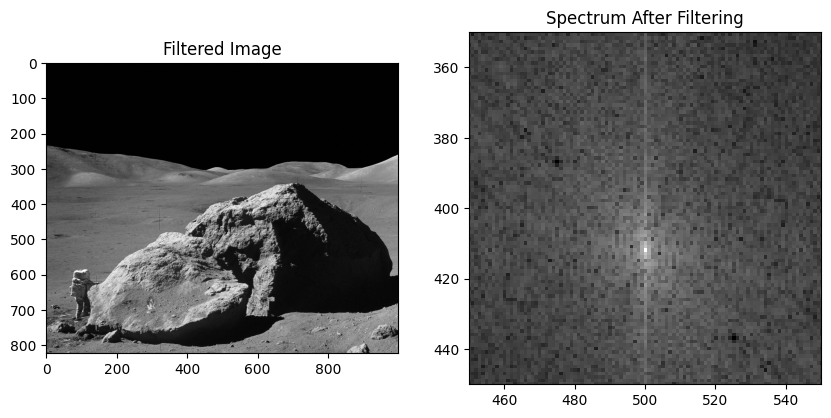

In [4]:
# cv2 library is imported
# matplotlib.pyplot function is imported as plt for displaying the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image 'astronaut-interference.tif' using cv2
image_astro = cv2.imread('astronaut-interference.tif', 0)
# Get the shape of the loaded image
img_shape = image_astro.shape

# Compute the 2D FFT of the grayscale image
f_3 = np.fft.fft2(image_astro)
# Shift the zero frequency components to the center
fshift_3 = np.fft.fftshift(f_3)
# Calculate the phase spectrum of the shifted FFT
phase_spectrumR_3 = np.angle(fshift_3)
# Calculate the magnitude spectrum and apply a transformation
magnitude_spectrum_3 = 20 * (np.log(np.abs(fshift_3)) ** 2.5)

# Function to calculate a Butterworth Notch Filter
def notch_filter(shape, D_0, u_k, v_k):
    n = 6   # Order of Transfer Function
    M, N = shape    # Shape of the image

    # Initialize filter with values as one
    H = np.zeros((M, N))
    
    # Loop through all the frequency components
    for u in range(0, M):
        for v in range(0, N):
            # Calculate distances from the center and apply the filter equation
            D_k1 = np.sqrt((u - M/2 - u_k)**2 + (v - N/2 - v_k)**2)
            D_k2 = np.sqrt((u - M/2 + u_k)**2 + (v - N/2 + v_k)**2)

            H[u, v] = (1 /(1 + (D_0/(D_k1 + 1e-6)**n))) * (1 /(1 + (D_0/(D_k2 + 1e-6))**n))

    return H

# Create a single notch filter with specific parameters
H1 = notch_filter(img_shape, 1, 25, 25)

# Apply the notch filter to the frequency domain representation of the image
NotchFilter = H1
NotchRejectCenter = fshift_3 * NotchFilter 
# Shift the zero frequency components back to their original locations
NotchReject = np.fft.ifftshift(NotchRejectCenter)
# Compute the inverse DFT of the result to obtain the filtered image
inverse_NotchReject = np.fft.ifft2(NotchReject)

# Calculate the absolute value of the inverse transform
Result_3 = np.abs(inverse_NotchReject)

# Create a figure for plotting
plt.figure(figsize=(10, 8))  
# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_astro, cmap='gray')
plt.title('Original Image')

# Subplot 2: Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_3, cmap='gray')
plt.title('Magnitude Spectrum')

# Create a figure for plotting
plt.figure(figsize=(10, 8))  
# Subplot 1: Magnitude Spectrum
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum_3, cmap='gray')
plt.title('Magnitude Spectrum (Zoomed)')
# Set a specific axis range for this subplot
plt.axis([450, 550, 450, 350])

# Subplot 2: Spectrum After Filtering
plt.subplot(1, 2, 2)
plt.imshow(NotchFilter, cmap='gray')
plt.title('Spectrum After Filtering (Zoomed)')
plt.axis([450, 550, 450, 350])

# Create a figure for plotting
plt.figure(figsize=(10, 8)) 
# Subplot 1: Filtered Image
plt.subplot(1, 2, 1)
plt.imshow(Result_3, cmap='gray')
plt.title('Filtered Image')

# Subplot 2: Spectrum After Filtering
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_3 * NotchFilter, cmap='gray')
plt.title('Spectrum After Filtering')
plt.axis([450, 550, 450, 350])

**Answer:**

The given image 'astronaut-interference.tif' is corrupted by a single, 2-D additive sine wave. So, it is a periodic noise which can be analyzed and filtered using frequency domain techniques. Periodic noise appears as concentrated bursts of energy in the Fourier transform, at locations corresponding the frequencies of the periodic interference. To get a better insight, we plotted the Fourier spectrum of the given image and observing it we can easily say that there is a pair of bright dots (concentrated bursts of energy) at the frequencies of the sine wave. For reduction of this periodic noise, we used selective filtering and specifically, we have used Notch filtering. As mentioned earlier, notch reject filter transfer functions are constructed as products of highpass filter transfer functions whose centers have been translated to the centers of the notches.

From the zoomed spectrum, we can easily determine the location of these impulses accurately. And we can eliminate or attenuate these impulses using the Notch filter. So, we have applied the same code that we used for 2nd problem. Just the difference here is that we only need to create one filter to attenuate the impulses. So, to perform this noise reduction, we performed following steps:

1) We found out the Fourier spectrum of the given image.
2) Found out the location of impulses by zooming in the spectrum.
3) Constructed the filter using the function 'notch_filter' function created in the code.
4) Multiplied the spectrum of the given image by the spectrum of the filter.
5) Obtained the filtered image by taking the inverse Fourier tranform of the filtered spectrum. 

Conclusion: According to the steps, the respective results which consist of plots and images can be seen above. The result of applying Notch filter is clearly visible in the final image. The periodic noise is almost completely removed from the given image using the above approach.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

4. Consider the image ’car motion blur.jpg’. The original image has been blurred using a motion blur kernel. Try restoring the original image. You can experiment with simple motion blur kernels of various sizes.

Text(0.5, 1.0, 'Magnitude Spectrum')

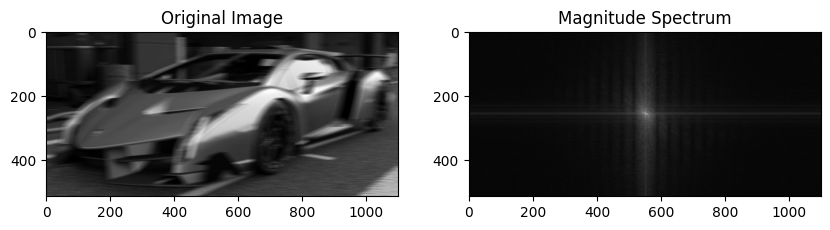

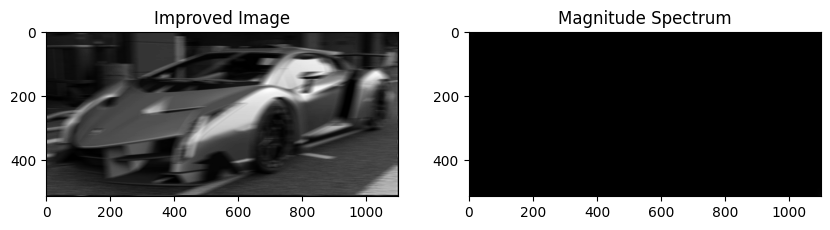

In [5]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image 'car_motion_blur.jpg'
image_car = cv2.imread('car_motion_blur.jpg', 0)

# Perform 2D Fast Fourier Transform (FFT) on the grayscale image
f_10 = np.fft.fft2(image_car)

# Shift the zero frequency components to the center of the spectrum
fshift_10 = np.fft.fftshift(f_10)

# Calculate the phase spectrum of the shifted FFT
phase_spectrumR = np.angle(fshift_10)

# Calculate the magnitude spectrum and apply a transformation to enhance visualization
magnitude_spectrum_10 = 20 * (np.log(np.abs(fshift_10) + 1) ** 3)

# Define the size 'n' for the kernel (Wiener filter)
n = 7
ker = np.zeros((n, n))

# Create a kernel with a horizontal line pattern (motion blur)
ker[int((n - 1) / 2)][:] = 1 / n

# Define a function for Wiener filtering
def wiener_filter(image, kernel, K):
    # Compute the 2D FFT of the input image
    degraded_image = np.fft.fft2(image)
    
    # Compute the 2D FFT of the kernel with size matching the image
    transfer_func = np.fft.fft2(kernel, s=image.shape)
    
    # Compute the complex conjugate of the transfer function
    trans_func_conj = np.conjugate(transfer_func)
    
    # Compute the magnitude squared of the transfer function
    abs_trans_func_sq = transfer_func * trans_func_conj
    
    # Compute the Wiener filter A based on the transfer function and regularization parameter K
    A = trans_func_conj / (abs_trans_func_sq + K)
    
    # Apply the Wiener filter to the degraded image in the frequency domain
    estimated_image = A * degraded_image

    return estimated_image

# Apply the Wiener filter with regularization parameter K=1
Answer_1 = wiener_filter(image_car, ker, 1)

# Compute the improved image by performing the inverse 2D FFT
improved_image = np.abs(np.fft.ifft2(Answer_1))

# Create a figure for plotting
plt.figure(figsize=(10, 8))

# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_car, cmap='gray')
plt.title('Original Image')

# Subplot 2: Magnitude Spectrum of the original image
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_10, cmap='gray')
plt.title('Magnitude Spectrum')

# Create another figure for plotting
plt.figure(figsize=(10, 8))

# Subplot 1: Improved Image
plt.subplot(1, 2, 1)
plt.imshow(improved_image, cmap='gray')
plt.title('Improved Image')

# Subplot 2: Magnitude Spectrum of the improved image
plt.subplot(1, 2, 2)
plt.imshow(np.abs(Answer_1), cmap='gray')
plt.title('Magnitude Spectrum')

**Answer:**

The given image 'car_motion_blur.jpg' is a motion blurred image. To remove the blurriness of the image, we can use Wiener filter which is also called as Minimum Mean Square Error Filtering. Also, we can use constrained least squares filtering to deblur the given image. Both these filters incorporate degradation function and statistical characteristics of noise into the restoration process. We tried implementing both Wiener and Least squares filter but, we were not able to improve the image. The above code contains the code for Wiener filter, the results obtained are also shown. It is evident from results that the code did not work as expected.

Text(0.5, 1.0, 'Magnitude Spectrum')

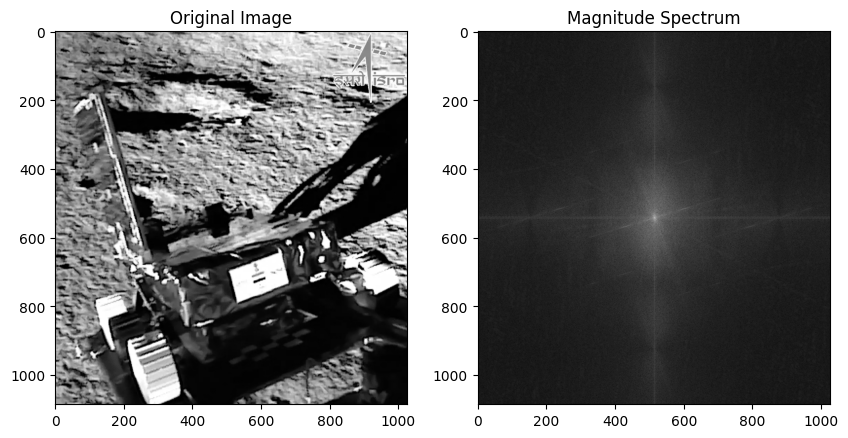

In [6]:
# cv2 library is imported
# matplotlib.pyplot function is imported as plt for displaying the image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image 'man_with_dots.jpg' using cv2
image_rover = cv2.imread('Rover_first_movement.jpg', 0)
# Get the shape of the loaded image
img_shape = image_rover.shape

# Compute the 2D FFT of the grayscale image
f_3 = np.fft.fft2(image_rover)
# Shift the zero frequency components to the center
fshift_3 = np.fft.fftshift(f_3)
# Calculate the phase spectrum of the shifted FFT
phase_spectrumR_3 = np.angle(fshift_3)
# Calculate the magnitude spectrum and apply a transformation
magnitude_spectrum_3 = 20 * (np.log(np.abs(fshift_3)) ** 2.5)

# Create a figure for plotting
plt.figure(figsize=(10, 8))  
# Subplot 1: Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rover, cmap='gray')
plt.title('Original Image')

# Subplot 2: Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_3, cmap='gray')
plt.title('Magnitude Spectrum')

-------------------------------------------------------------------------------------------------------------------------------------

**References**

1) OpenCV library documentation - https://docs.opencv.org/4.x/
2) NumPy user guide - https://numpy.org/doc/stable/user/index.html#user
3) Geeks for Geeks OpenCV Python Tutorial - https://www.geeksforgeeks.org/opencv-python-tutorial/